# A FIRST LOOK AT A NEURAL NETWORK
![title](./pics/neural-net.png)

In [21]:
# imports

# keras imports
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras import models
from keras import layers

# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np

# utility functions
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from utility.utils import utils
utility_obj = utils()

## Data preparation

### Scalars (0D tensors)
A tensor that contains only one number is called a "scalar" (or "scalar tensor", or 0-dimensional tensor, or 0D tensor)

In [22]:
x = np.array(12)
print ("array:{} , dimension of array:{}".format(x,x.ndim))

array:12 , dimension of array:0


### Vectors (1D tensors)

In [23]:
x = np.array([12, 3, 6, 14])
print ("array:{} , dimension of array:{}".format(x,x.ndim))

array:[12  3  6 14] , dimension of array:1


### Matrices (2D tensors)

In [24]:
x = np.array([  [5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]])
print ("array:{} , dimension of array:{}".format(x,x.ndim))

array:[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]] , dimension of array:2


### 3D tensors and higher-dimensional tensors

In [25]:
x = np.array([
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ]
])
print ("array:{} , dimension of array:{}".format(x,x.ndim))

array:[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]] , dimension of array:3


### Preparing mnist data for model training

#### data statistics

mnist images are 28*28 images

train data shape: (60000, 784)
test data shape: (10000, 784) 

train labels shape: (60000, 10)
test labels shape: (10000, 10) 

MNIST data:

 displaying an image in training data


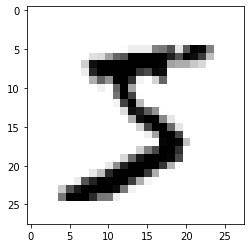

sample training labels
[5 0 4 1 9 2 1 3 1 4]

training lables after one hot encoding
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalizing training and test images
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Preparing the labels
temp_train_labels = train_labels[:10]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

display(Markdown("#### data statistics")) 
print ("mnist images are 28*28 images\n")
print('train data shape:', train_images.shape)
print('test data shape:', test_images.shape, "\n")

print('train labels shape:', train_labels.shape)
print('test labels shape:', test_labels.shape, "\n")


print("MNIST data:")
print ("\n displaying an image in training data")
digit = train_images[0]
plt.imshow(np.reshape(digit,(28,28)), cmap=plt.cm.binary)
plt.show()

print ("sample training labels")
print (temp_train_labels)
print ("\ntraining lables after one hot encoding")
print(train_labels[:10])

## The network architecture
#### output = relu ( dot ( W, input ) + b )

In [27]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
#The compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Training the network

In [31]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9939
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0169 - accuracy: 0.9952
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0128 - accuracy: 0.9961
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0103 - accuracy: 0.9971


### Visualize results

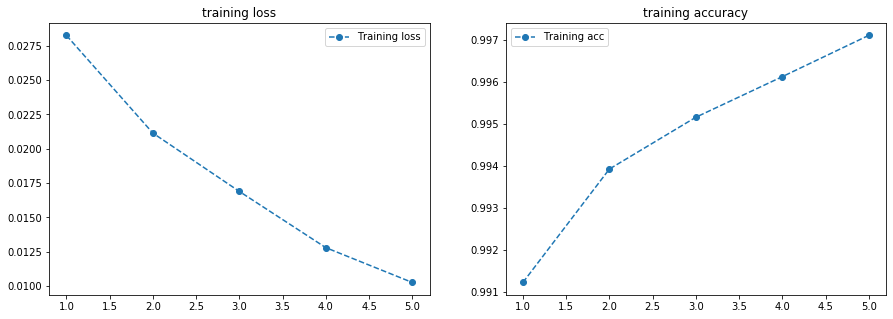

In [32]:
# ploting model training results
utility_obj.plot_training_history(history_dict=history.history, plot_val=False)

### Evaluating the network

In [33]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('\ntest_acc:', round(test_acc,2),"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9818

test_acc: 0.98 %


## Basic naive functions implementations in numpy

### A naive implementation of an element-wise "relu" operation

In [12]:
def naive_relu(x):
    # x is 2D Numpy tensor
    assert len(x.shape) == 2
    x = x.copy()  # Avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

## A naive implementation of element-wise addition

In [13]:
def naive_add(x, y):
    # x and y are 2D Numpy tensors
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()  # Avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

### Native element-wise operation in Numpy

In [14]:
# Element-wise addition 
z = x + x
# Element-wise relu
z = np.maximum(z, 0.)

### A naive implementation of matrix-vector addition

In [15]:
def naive_add_matrix_and_vector(x, y):
    # x is a 2D Numpy tensor
    # y is a Numpy vector
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()  # Avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

### Applying the element-wise maximum operation to two tensors of different shapes via broadcasting

In [16]:
# x is a random tensor with shape (64, 3, 32, 10)
x = np.random.random((64, 3, 32, 10))
# y is a random tensor with shape (32, 10)
y = np.random.random((32, 10))
# The output z has shape (64, 3, 32, 10) like x
z = np.maximum(x, y)

### A naive implementation of dot

In [17]:
def naive_vector_dot(x, y):
    # x and y are Numpy vectors
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

### A naive implementation of matrix-vector dot

In [18]:
def naive_matrix_vector_dot(x, y):
    # x is a Numpy matrix
    # y is a Numpy vector
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    # The 1st dimension of x must be
    # the same as the 0th dimension of y!
    assert x.shape[1] == y.shape[0]
    # This operation returns a vector of 0s
    # with the same shape as y
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

# Alternative naive implementation of matrix-vector dot

def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

### A naive implementation of matrix-matrix dot

In [19]:
def naive_matrix_dot(x, y):
    # x and y are Numpy matrices
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    # The 1st dimension of x must be
    # the same as the 0th dimension of y!
    assert x.shape[1] == y.shape[0]
    # This operation returns a matrix of 0s
    # with a specific shape
    z = np.zeros((x.shape[0], y.shape[1]))
    # We iterate over the rows of x
    for i in range(x.shape[0]):
        # And over the columns of y
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### A naive implementation of gradient descent with momentum

In [ ]:
######################   PSEUDO CODE   #############################
past_velocity = 0.
loss = 100
momentum = 0.1  # A constant momentum factor
while loss > 0.01:  # Optimization loop
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum + learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)
####################################################################

## What’s a derivative?

Consider a continuous, smooth function 

```f(x) = y,``` 

mapping a real number x to a new real number y. 
Because the function is continuous, a small change in x can only result in a small change in y—that’s the intuition behind continuity. Let’s say you increase x by a small factor epsilon_x: this results in an small epsilon_y change to y.

```f(x + epsilon_x) = y + epsilon_y```

when epsilon_x is "small enough", then around a certain point p, it is possible to approximate f as a linear function of slope a, so that epsilon_y becomes a * epsilon_x:


```f(x + epsilon_x) = y + a * epsilon_x```

![title](./pics/derivative.png)

We saw earlier that the derivative of a function f(x) of a single coefficient could be interpreted as the slope of the curve of f. Likewise, gradient(f)(W0) can be interpreted as the tensor describing the curvature of f(W) around W0

For this reason, in much the same way that, for a function f(x), you could lower the value of f(x) by moving x by a little bit in the direction opposite to the derivative, with a function f(W) of a tensor, you can lower f(W) by moving W in the direction opposite to the gradient, 


e.g. ```W1 = W0 - step * gradient(f)(W0)``` 
(where step is a small scaling factor). 


That simply means "going opposite to the curvature", which intuitively should get you lower on the curve. Note that the scaling factor step is needed because gradient(f)(W0) only approximates the curvature when you are close to W0, so you don’t want to get too far away from W0

![title](./pics/sgd.png)
